Tenemos que las interaccinoes para el modelo que estamos considerando:

$$ {a} \xrightarrow{s} {a} + {a} $$
$$ {a} \xrightarrow{\gamma} {a} + {i} $$
$$ {a} + {i} \xrightarrow{\beta} {i} $$
$$ {a} + {a} \xrightarrow{\beta} {i} $$


De ahí, es que tenemos el sistema. 

$$ \dfrac{\partial a}{\partial t} = sa - \beta a (i + a) + D \ \nabla^2 a $$

$$ \dfrac{\partial i}{\partial t} = \gamma a + \beta a^2$$

0.0


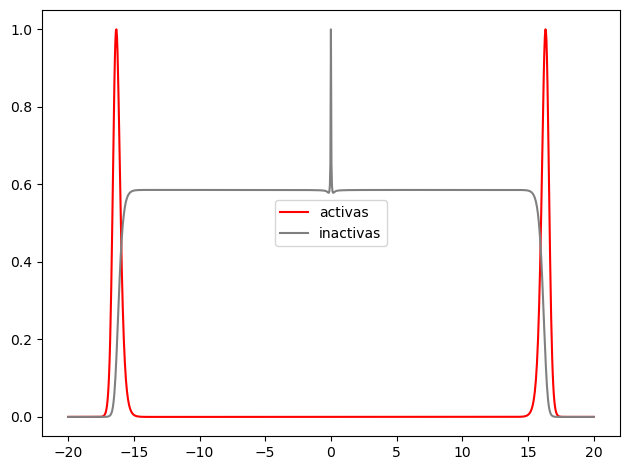

In [93]:
import numpy as np

# Parámetros del dominio y tiempo
Lx = 20
Nx = 1001      
Dx = Lx / Nx   
T = 200
dt = 0.1      
x = np.linspace(-Lx, Lx, Nx)
print(x[int(Nx/2)])
# Constantes del sistema
s = 0.5
beta = 1
D = 0.001
gamma = 0.1


# Inicialización de campos
a = np.zeros_like(x) # Perturbación inicial en a
a[int(Nx/2)] = 1
i = np.zeros_like(x)  # Perturbación inicial en i

# Función para calcular el laplaciano en 1D
def laplacian_1D(Z, Dx):
    return (np.roll(Z, 1) - 2 * Z + np.roll(Z, -1)) / Dx**2


time_steps = int(T / dt)
a_over_time = np.zeros((time_steps, Nx))
i_over_time = np.zeros((time_steps, Nx))

for t in range(time_steps):
    lap_a = laplacian_1D(a, Dx)

    da_dt = s*a -beta*a*(i+a) + D*lap_a
    di_dt = gamma*a + beta*a*(a+i) 
    a += dt * da_dt
    i += dt * di_dt

    a[0], a[-1] = a[1], a[-2]
    i[0], i[-1] = i[1], i[-2]

    a_over_time[t, :] = a
    i_over_time[t, :] = i

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

i = 1999

plt.plot(x, a_over_time[i]/np.max(a_over_time[i]), label='activas', color='red')
plt.plot(x, i_over_time[i]/np.max(i_over_time[i]), label='inactivas', color='grey')
plt.legend()
plt.tight_layout()
#plt.savefig('simulaciont' + str(i) + '.svg', format='svg', dpi=300, transparent=True)

In [105]:
import funciones_new1510 as fn
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import networkx as nx
import copy

# import cProfile, pstats, io    # Este es un snippet de código para hacer profiling, ver cuanto y qué demora.
# profiler = cProfile.Profile()
# profiler.enable()

# -------------------------------


estadistica_poslist_estado = []
estadistica_edgelist_estado = []
estadistica_indactivo_estado = []
estadistica_inactivas_estado = []
estadistica_propensas_estado = []

for i in range(400):
    print(i)
    ind_activo = [0]
    ang = np.pi/3

    opt1 = np.array([np.cos(0*ang),np.sin(0*ang)])
    std = 1
    #------------------------------------------------

    positions_list = np.array([0*opt1])
    edgelist = [[0]]
    N_part = 1
    t_vida = np.ones(len(positions_list))
    t_crit = 12
    t_final = 300

    # Tamaño del corredor
    bordes = (22,4)

    r_a = 0.9
    r_s = 0.1

    # Inicialmente 

    N_a = N_part
    N_s = 0

    # Listas de estado

    positions_list_estado = []
    edgelist_estado = []
    ind_activo_estado = []
    propensas_estado = []
    inactivas_estado = []
    while t_vida[0]<t_final:
        
        
        #----------------SELECCION DE PROCESO---------------------------------

        #----------------------Gillespie--------------------------------------
        alpha_1 = r_a*N_a
        alpha_2 = r_s*N_s 
        alpha = alpha_1 + alpha_2

        p = alpha_1/alpha
        
        # Seleccion de numeros aleatorios
        
        u1 = np.random.rand()
        u2 = np.random.rand()

        # Seleccion de tiempo (gillespie)
        t_jump = -1
        
        if u1 < p:

            #-----------------PROCESO DE CRECIMIENTO------------------------------
            ##################----------------------###########################
            a = fn.move(positions_list, ind_activo, edgelist, std, bordes)
            positions_list = a
            b = fn.check_vecinos(positions_list, edgelist, std, bordes)
            ind_activo = b
            N_part = N_part + 1
            t_vida_el = 0
            t_vida = np.append(t_vida, t_vida_el)
            t_vida = t_vida - t_jump
        
        elif u1<1:
            #-------------------PROCESO DE MUERTE---------------------------------
            ##################----------------------############################
            a = fn.kill(propensas, positions_list, t_vida, edgelist)
            positions_list = a
            b = fn.check_vecinos(positions_list, edgelist, std, bordes)
            ind_activo = b
            
            N_part = N_part - 1
            t_vida = t_vida - t_jump

        
        
        G = nx.DiGraph()
        G.add_edges_from([x for x in edgelist[1:] if isinstance(x, list)])
        


        inactivas = {n for n in G.nodes()}
        inactivas = [x for x in inactivas if x not in ind_activo]
        puntas = {n for n, d in G.degree() if d == 1}
        


        propensas = []
        for terminal in puntas:
            if t_vida[terminal] <= t_crit:
                propensas.append(terminal)

        propensas = [x for x in propensas if x not in ind_activo]
        N_a = len(ind_activo)
        N_s = len(propensas)


        # Guardado de estado
        positions_list_estado.append(positions_list)
        edgelist_estado.append(copy.deepcopy(edgelist))
        ind_activo_estado.append(ind_activo)
        propensas_estado.append(propensas)
        inactivas_estado.append(inactivas)
    
    estadistica_poslist_estado.append(positions_list_estado)
    estadistica_edgelist_estado.append(edgelist_estado)
    estadistica_indactivo_estado.append(ind_activo_estado)
    estadistica_inactivas_estado.append(inactivas_estado)

    estadistica_propensas_estado.append(propensas_estado)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [96]:
import pickle
filename= 'estadisticacorredor1910(1).pkl'



#datos = [estadistica_poslist_estado, estadistica_edgelist_estado, estadistica_inactivas_estado, estadistica_propensas_estado, estadistica_indactivo_estado]
with open(filename, 'rb') as fp:
    cargadatos = pickle.load(fp)


[estadistica_poslist_estado, estadistica_edgelist_estado, estadistica_inactivas_estado, estadistica_propensas_estado, estadistica_indactivo_estado] = cargadatos

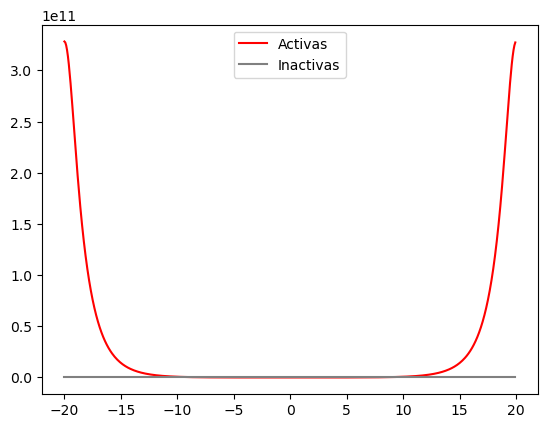

In [91]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros del dominio y tiempo
Lx = 20  # Longitud del dominio (negativo y positivo)
Nx = 512  # Número de puntos (mejor resolución para Fourier)
Dx = Lx / Nx  # Tamaño de celda
x = np.linspace(-Lx, Lx, Nx, endpoint=False)  # Dominio
T = 200  # Tiempo total
dt = 0.1  # Paso de tiempo

# Constantes del sistema
s = 0.2
beta = 0.1
D = 0.001
gamma = 0.1

# Inicialización de campos en el dominio real
sigma = 5  # Anchura inicial
a = np.exp(-x**2 / (2 * sigma**2))  # Perfil inicial amplio
i = np.zeros_like(x)  # Campo inactivo inicial

# Números de onda para el espacio de Fourier
k = 2 * np.pi * np.fft.fftfreq(Nx, Dx)

# Transformadas iniciales al espacio de Fourier
a_hat = np.fft.fft(a)
i_hat = np.fft.fft(i)

# Almacenar los resultados en el dominio real
time_steps = int(T / dt)
a_over_time = np.zeros((time_steps, Nx))
i_over_time = np.zeros((time_steps, Nx))

for t in range(time_steps):
    # Término de difusión en Fourier: -D * k^2 * a_hat
    lap_a_hat = -k**2 * a_hat * D

    # Transformada inversa para evaluar las ecuaciones en el dominio real
    a_real = np.fft.ifft(a_hat).real
    i_real = np.fft.ifft(i_hat).real

    # Evaluación de los términos de reacción en el dominio real
    da_dt = s * a_real - beta * a_real * (i_real + a_real)
    di_dt = gamma * a_real + beta * a_real * (i_real + a_real)

    # Transformación al espacio de Fourier de los términos de reacción
    a_hat += dt * np.fft.fft(da_dt) + dt * lap_a_hat
    i_hat += dt * np.fft.fft(di_dt)

    # Guardar los resultados en el dominio real
    a_over_time[t, :] = np.fft.ifft(a_hat).real
    i_over_time[t, :] = np.fft.ifft(i_hat).real

# Visualización del estado final
i=700
plt.plot(x, a_over_time[i] / np.max(a_over_time[-1]), label='Activas', color='red')
plt.plot(x, i_over_time[i] / np.max(i_over_time[-1]), label='Inactivas', color='grey')
plt.legend()
plt.show()


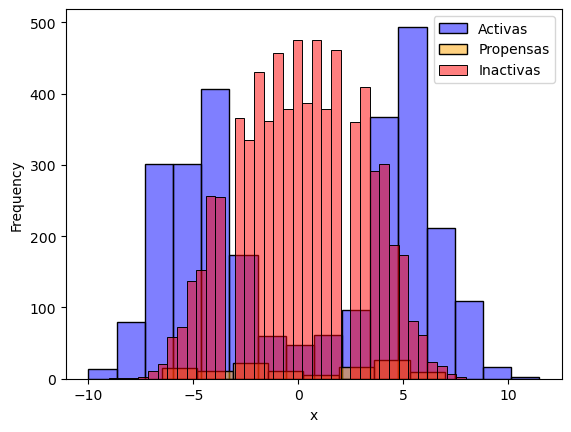

/var/folders/wl/57dgndyn6cx8gs59k8z5t2h00000gn/T/ipykernel_1943/1111723921.py:78: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  ax2.plot(x_values, y_values, 'k-', color='black')


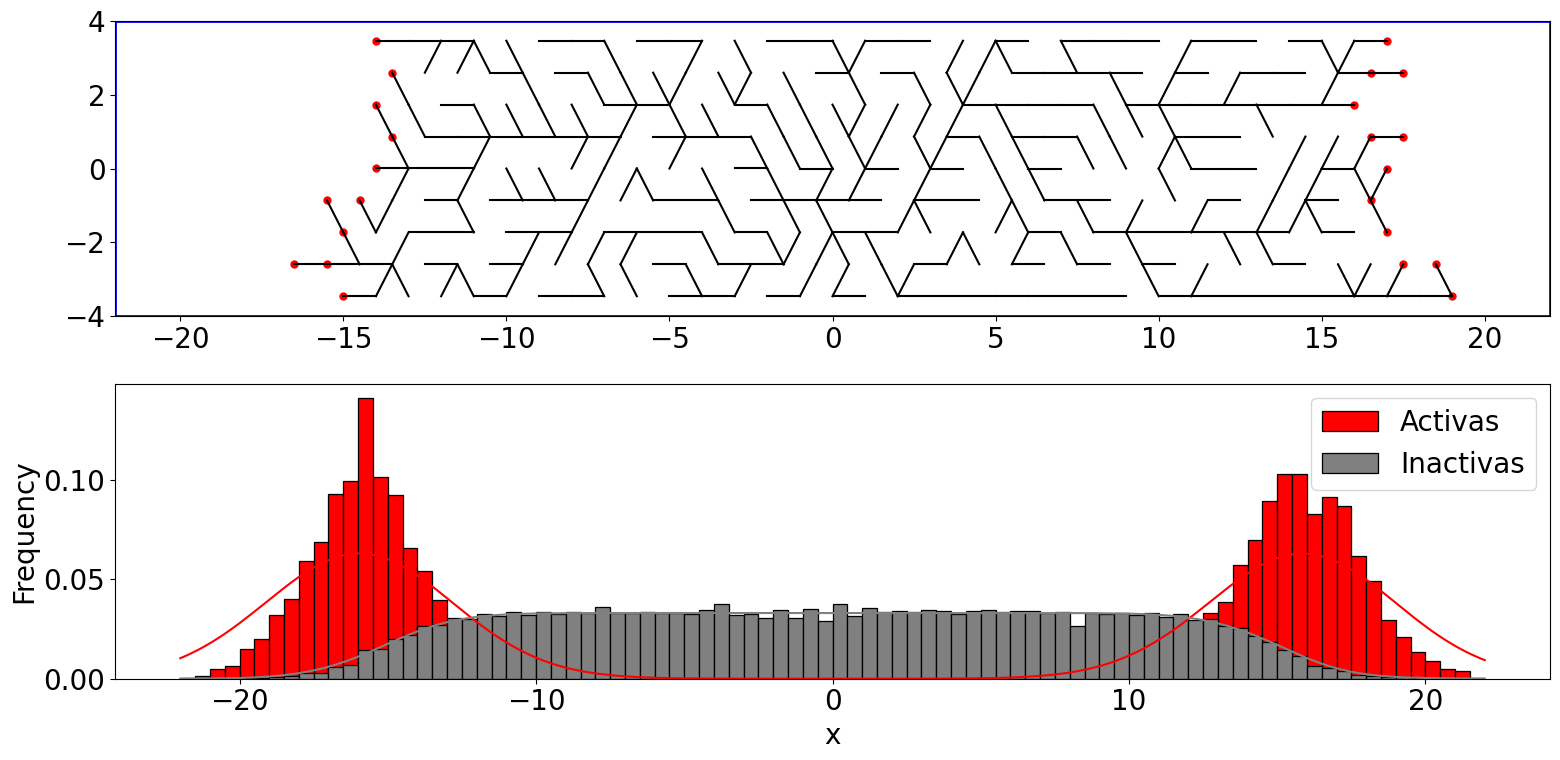

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.gridspec import GridSpec

# ------------- FIGURA 1: Histograma -----------------
plt.rcParams.update({'font.size': 20})


# Tiempo i
i = 150

x_activas = []
x_inactivas = []
x_propensas = []

for j in range(400):
    positions_lists_j = estadistica_poslist_estado[j]
    edgelists_j = estadistica_edgelist_estado[j]
    indactivo_j = estadistica_indactivo_estado[j]
    inactivas_j = estadistica_inactivas_estado[j]
    propensas_j = estadistica_propensas_estado[j]

    positions_list_estado_i = positions_lists_j[i]
    edgelist_estado_i = edgelists_j[i]
    ind_activo_estado_i = indactivo_j[i]
    inactivas_estado_i = inactivas_j[i]
    propensas_estado_i = propensas_j[i]

    x_activas += positions_list_estado_i[ind_activo_estado_i, 0].tolist()
    x_inactivas += positions_list_estado_i[inactivas_estado_i, 0].tolist()
    x_propensas += positions_list_estado_i[propensas_estado_i, 0].tolist()

x_activas = (x_activas)
x_inactivas = (x_inactivas)
x_propensas = (x_propensas)

# ------------- FIGURA 2: Estado a tiempo i -----------------

# Configurar el entorno
positions_list_estado = estadistica_poslist_estado[0]  # Modifica según tu estructura
edgelist_estado = estadistica_edgelist_estado[0]
ind_activo_estado = estadistica_indactivo_estado[0]
bordes = [22, 4]  # Define el tamaño del rectángulo

# Crear el collage
fig_collage = plt.figure(figsize=(16, 8))
gs = GridSpec(2, 1, figure=fig_collage)

# Subplot 1: Histograma
ax1 = fig_collage.add_subplot(gs[1, 0])
bins = np.arange(-22, 22, 0.5)
sns.histplot(data=x_activas, color='red', alpha=1, label='Activas', bins=bins, kde=True, stat='density', ax=ax1)
#sns.histplot(data=x_propensas, color='orange', alpha=1, label='Propensas', bins=bins, kde=True, stat='density', ax=ax1)
sns.histplot(data=x_inactivas, color='grey', alpha=1, label='Inactivas', bins=bins, kde=True, stat='density', ax=ax1)
ax1.set_xlabel('x')
ax1.set_ylabel('Frequency')
ax1.legend()

# Subplot 2: Estado a tiempo i
ax2 = fig_collage.add_subplot(gs[0, 0])
ax2.set_xlim(-bordes[0], bordes[0])
ax2.set_ylim(-bordes[1], bordes[1])

positions_list_i = positions_list_estado[i]
edgelist_i = edgelist_estado[i]
ind_activo_i = ind_activo_estado[i]

# Dibujar los nodos y conexiones
ax2.scatter(positions_list_i[ind_activo_i, 0], positions_list_i[ind_activo_i, 1], color='red', s=25, label="Nodos activos")
for j in range(1, len(edgelist_i)):
    if isinstance(edgelist_i[j], list):
        idx_anterior = edgelist_i[j][0]
        idx_siguiente = edgelist_i[j][1]
        x_values = [positions_list_i[idx_anterior, 0], positions_list_i[idx_siguiente, 0]]
        y_values = [positions_list_i[idx_anterior, 1], positions_list_i[idx_siguiente, 1]]
        ax2.plot(x_values, y_values, 'k-', color='black')

# Agregar rectángulo
rect = Rectangle(
    (-bordes[0], -bordes[1]),
    2 * bordes[0],
    2 * bordes[1],
    linewidth=2, edgecolor='blue', facecolor='none'
)
ax2.add_patch(rect)

# ------------- Ajustes Finales -----------------

fig_collage.tight_layout()
fig_collage.savefig('collaget_' + str(i) + '.svg', format='svg', dpi=300, transparent=True)
plt.show()
